# Beer Consumption


## Overview


## Importing Libraries

In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LinearRegression, Lasso # type: ignore
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_percentage_error # type: ignore

## 1. Data Loading

In [2]:
df = pd.read_csv('data/Consumo_cerveza_SP.csv')

## 2. Data Proprocessing

### 2.1 Data Exploring

In [3]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [5]:
df.dtypes

Data                            object
Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object

### 2.2 Data Cleaning

In [6]:
df.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [7]:
df.columns = ['datetime', 'mean_temp', 'min_temp', 'max_temp', 'precipitation', 'end_of_week', 'beer_consumption']

In [8]:
df.isnull().sum()

datetime            576
mean_temp           576
min_temp            576
max_temp            576
precipitation       576
end_of_week         576
beer_consumption    576
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,datetime,mean_temp,min_temp,max_temp,precipitation,end_of_week,beer_consumption
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [13]:
df['min_temp'] = df['min_temp'].apply(lambda x: x.replace(',', '.')).astype(float)
df['mean_temp'] = df['mean_temp'].apply(lambda x: x.replace(',', '.')).astype(float)
df['max_temp'] = df['max_temp'].apply(lambda x: x.replace(',', '.')).astype(float)
df['precipitation'] = df['precipitation'].apply(lambda x: x.replace(',', '.')).astype(float)

In [14]:
df['end_of_week'] = df['end_of_week'].apply(lambda x: 1 if x else 0)

### 2.3 Data Visualization

### 2.4 Handle Missing Values

In [15]:
df.isna().sum()

datetime            0
mean_temp           0
min_temp            0
max_temp            0
precipitation       0
end_of_week         0
beer_consumption    0
dtype: int64

### 2.5 Outlier Handling

In [16]:
float_cols = df.select_dtypes(include=['float64']).columns

In [17]:
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.stats import zscore, iqr
from sklearn.ensemble import IsolationForest
import numpy as np

def iqr_outliers(df, columns, iqr_factor=1.5, remove=False, return_index = False):
    outliers_info = {}
    outliers_indexs = set()

    for column in columns:
        Q1 = np.percentile(df[column].dropna(), 25)
        Q3 = np.percentile(df[column].dropna(), 75)
        IQR = iqr(df[column].dropna())

        lim_inf = Q1 - iqr_factor * IQR
        lim_sup = Q3 + iqr_factor * IQR
        outliers = df[(df[column] < lim_inf) | (df[column] > lim_sup)]

        if not outliers.empty:
          outliers_info[column] = len(outliers)
          outliers_indexs.update(outliers.index)

    df_results = pd.DataFrame(outliers_info, index=['outliers']).T
    
    if remove:
        df.drop(index=outliers_indexs, inplace=True)
        df.reset_index(drop=True,inplace=True)
        print(f'\n{len(outliers_indexs)} were removed.')
    
    if return_index:
        return outliers_indexs
    else: 
        return df_results

def plot_boxplots(df, columns, n_cols=3, figsize=(5, 4)):
    n_rows = math.ceil(len(columns) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, column in enumerate(columns):
        df.boxplot(column=column, ax=axes[i])
        axes[i].set_title(column)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


def z_score_outliers(df, cols, threshold=3, remove=False, return_index=False):
    outliers_info = {}
    outliers_indexs = set()

    for col in cols:
        z_scores = zscore(df[col].dropna())

        outliers = df[col][(z_scores > threshold) | (z_scores < -threshold)]

        if not outliers.empty:
            outliers_info[col] = len(outliers)
            outliers_indexs.update(outliers.index)
 
    df_results = pd.DataFrame(outliers_info, index=['outliers']).T

    if remove:
        df.drop(index=outliers_indexs, inplace=True)
        df.reset_index(drop=True,inplace=True)
        print(f'\n{len(outliers_indexs)} were removed.')
    
    if return_index:
        return outliers_indexs
    else: 
        return df_results

def isolation_forest_outliers(df, columns, contamination=0.05, remove=False, return_index=False):
    outliers_info = {}
    
    iso_for = IsolationForest(contamination=contamination)
    df_copy = df.copy()
    df_copy['outlier_score'] = iso_for.fit_predict(df_copy[columns])
    
    outliers = df_copy[df_copy['outlier_score'] == -1]
    outliers_index = outliers.index.tolist()

    if remove:
        df.drop(index=outliers_index, inplace=True)
        df.reset_index(drop=True,inplace=True)
        print(f'{len(outliers_index)} were dropped')

    if return_index:
        return outliers_index
    else:
        return print(f'{len(outliers)} outliers')

In [18]:
iqr_outliers(df, float_cols, iqr_factor=1.5,return_index=False)

,outliers
max_temp,1
precipitation,64


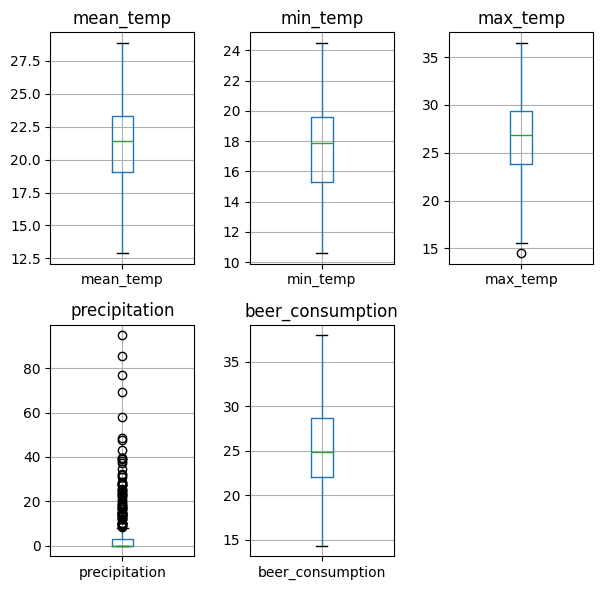

In [19]:
plot_boxplots(df, float_cols, n_cols=3, figsize=(6, 6))

In [20]:
z_score_outliers(df, float_cols, threshold=3,return_index=False)

,outliers
precipitation,8


In [21]:
isolation_forest_outliers(df, float_cols)

19 outliers


I don't drop any rows because I don't consider outliers can impact the results.

### 2.6 Feature Engineering

#### 2.6.1 Feature Selection

##### Continous -> Continous

In [22]:
def corr_pearson(df, features,target , method='pearson', show_plot=False):
    
    float_cols = features.append(pd.Index([target]))
    df = df[float_cols]
    corr_info = df.corr(method=method)

    if show_plot:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_info, annot=True, cmap='coolwarm', center=0)
        plt.show()
    else:
        corr_info = corr_info[target].sort_values(ascending=False)
        return corr_info

In [23]:
def corr_spearman(df,features,target):

    corr_info = []

    for feature in features:
        spearman_corr = df[feature].corr(df[target], method="spearman")
        corr_info.append({
            "Feature": feature,
            "Spearman Correlation": spearman_corr
        })
    
    return pd.DataFrame(corr_info).sort_values('Spearman Correlation', ascending=False)

In [24]:
from sklearn.feature_selection import mutual_info_regression

def mutual_info(df, features, target):
    results = mutual_info_regression(df[features], df[target])
    results = pd.Series(results, index=features)
    return results.sort_values(ascending=False)

In [25]:
float_features = float_cols.drop('beer_consumption')

In [26]:
corr_pearson(df, float_features, 'beer_consumption', show_plot=False)

beer_consumption    1.000000
max_temp            0.642672
mean_temp           0.574615
min_temp            0.392509
precipitation      -0.193784
Name: beer_consumption, dtype: float64

In [27]:
corr_spearman(df,float_features , 'beer_consumption')

,Feature,Spearman Correlation
2,max_temp,0.641289
0,mean_temp,0.569998
1,min_temp,0.391495
3,precipitation,-0.172381


In [28]:
mutual_info(df,float_features , 'beer_consumption')

max_temp         0.296725
mean_temp        0.227284
min_temp         0.106666
precipitation    0.060412
dtype: float64

#### categorical -> continous

In [29]:
from scipy.stats import f_oneway

def one_way_anova(df, features, target, return_results = False):
    results = []
    important_features = []
    no_important_features = []

    for feature in features:
        groups = [df[df[feature] == group][target].dropna() for group in df[feature].unique()]
        f_stat, p_value = f_oneway(*groups)

        if p_value < 0.05:
            important_features.append(feature)
            is_important = True
        else:
            no_important_features.append(feature)
            is_important = False
        
        results.append({
            "Feature": feature,
            "F-Statistic": f_stat,
            "P-Value": p_value,
            "Is Important": is_important
        })

    result_df = pd.DataFrame(results).sort_values('P-Value')

    if return_results:
        print(",".join(important_features))
        return important_features, no_important_features
    else:
        return result_df

In [30]:
categorical_features = df.select_dtypes(include=['int']).columns

In [31]:
one_way_anova(df, categorical_features, 'beer_consumption', return_results=False)

,Feature,F-Statistic,P-Value,Is Important
0,end_of_week,124.913906,4.007969e-25,True


#### selecting the important features

In [32]:
df_model = df[['mean_temp', 'min_temp', 'max_temp','end_of_week', 'beer_consumption']]

In [33]:
df_model = df[['mean_temp', 'max_temp', 'min_temp', 'end_of_week', 'beer_consumption']]

#### 2.6.2 Feature Transformation

### 2.7 Feature Encoding

### 2.8 Feature Scaling

## 3. Machine Learning Models

In [46]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

regression_metrics = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R²'])

def save_metrics(model, y_test, y_pred):
    global regression_metrics
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    new_row = {
        'Model': model,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    }
    
    new_row_df = pd.DataFrame([new_row]).dropna(axis=1, how='all')
    regression_metrics = pd.concat([regression_metrics, new_row_df], ignore_index=True)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title("Residuals Distribution")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.axvline(0, color='red', linestyle='--')
    plt.show()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df_model.drop(columns = 'beer_consumption'), df_model['beer_consumption'], test_size=0.2, random_state=42)

### 3.1 Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_1 = lr.predict(x_test)

save_metrics('Linear Regression', y_test, y_pred_1)

In [51]:
lr_lasso = Lasso()
lr_lasso.fit(x_train, y_train)
y_pred_2 = lr_lasso.predict(x_test)

save_metrics('Lasso', y_test, y_pred_2)

In [53]:
lr_ridge= Ridge()
lr_ridge.fit(x_train, y_train)
y_pred_3 = lr_ridge.predict(x_test)

save_metrics('Ridge', y_test, y_pred_3)

In [57]:
lr_elasticnet = ElasticNet()
lr_elasticnet.fit(x_train, y_train)
y_pred_4 = lr_elasticnet.predict(x_test)

save_metrics('ElasticNet', y_test, y_pred_4)

### 3.2 DecisionTreeRegressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion="squared_error", max_depth=3)
dtr.fit(x_train, y_train)
y_pred_5 = dtr.predict(x_test)
save_metrics('Decision Tree Regressor', y_test, y_pred_5)

### 3.3 Gradient Boosting Regressor

In [62]:
regression_metrics

,Model,MAE,MSE,RMSE,R²,MAPE
0,Linear Regression,2.168775,6.955511,2.637330,0.686110,0.084322
1,Linear Regression,3.007206,14.021036,3.744467,0.367255,0.112653
2,Lasso,3.007206,14.021036,3.744467,0.367255,0.112653
3,Ridge,2.171058,6.958449,2.637887,0.685978,0.084351
4,Linear Regression,2.168775,6.955511,2.637330,0.686110,0.084322
5,ElasticNet,2.795295,12.197563,3.492501,0.449546,0.104997
6,Decision Tree Regressor,2.237720,7.721954,2.778840,0.651522,0.086848


In [191]:
def estacion_bra(fecha):
    if fecha.month == 12 and fecha.day >= 21 or fecha.month in [1, 2] or (fecha.month == 3 and fecha.day <= 20):
        return 'Verano'
    elif fecha.month == 3 and fecha.day >= 21 or fecha.month in [4, 5] or (fecha.month == 6 and fecha.day <= 20):
        return 'Otoño'
    elif fecha.month == 6 and fecha.day >= 21 or fecha.month in [7, 8] or (fecha.month == 9 and fecha.day <= 20):
        return 'Invierno'
    elif fecha.month == 9 and fecha.day >= 21 or fecha.month in [10, 11] or (fecha.month == 12 and fecha.day <= 20):
        return 'Primavera'


# Aplica la función para categorizar las fechas por estaciones
df['estacion'] = df['fecha'].apply(estacion_bra)

In [192]:
df.drop(columns='fecha',inplace=True)

In [193]:
lbl_enc = LabelEncoder()
df['estacion'] = lbl_enc.fit_transform(df['estacion'])

In [194]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='lt_de_cerveza'),df['lt_de_cerveza'],test_size=0.25)

## Funcions

In [195]:
metrics_list = []
def metrics(model, y_test, predictions):
    rmse = root_mean_squared_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test,predictions)
    r2 = r2_score(y_test, predictions)
    metrics_list.append([model.__class__.__qualname__,rmse,mape,r2])

In [196]:
def scatter_plot(y_test, predictions, model):
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, predictions, color='blue', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea diagonal
    plt.title(f'Scatter Plot - {model.__class__.__qualname__}')
    plt.xlabel('True Values')
    plt.ylabel('Predict Values')
    plt.grid(True)
    plt.show()

In [197]:
def residual_plot(y_test,predictions, model):
    residuos = [real - pred for real, pred in zip(y_test, predictions)]

    plt.figure(figsize=(8, 4))
    plt.scatter(predictions, residuos, color='blue', alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual plot  - {model.__class__.__qualname__}')
    plt.xlabel('Predict Values')
    plt.ylabel('Scraps')
    plt.grid(True)
    plt.show()

## LinearRegression

In [198]:
lnlreg = LinearRegression()

lnlreg.fit(x_train,y_train)
predictions_1 = lnlreg.predict(x_test)
metrics(lnlreg, y_test,predictions_1)

In [ ]:
scatter_plot(y_test, predictions_1, lnlreg)

In [ ]:
residual_plot(y_test,predictions_1, lnlreg)

## Lasso

In [201]:
lasso = Lasso()

lasso.fit(x_train,y_train)
predictions_2 = lasso.predict(x_test)
metrics(lasso, y_test,predictions_2)

In [ ]:
scatter_plot(y_test, predictions_2, lasso)

In [ ]:
residual_plot(y_test,predictions_2, lasso)

## Metrics

In [ ]:
pd.DataFrame(metrics_list,columns=['model','rmse','mape','r2'])